In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
RESULT_PATH = "../results/stats_pruning_libraries.txt"
# RESULT_PATH = "../results/stats_pruning_cedar.txt"
RESULT_PATH = "../results/stats_pruning_dafnyVMC.txt"
PROJECT = "dafnyVMC"
df = pd.read_csv(RESULT_PATH)

In [18]:
df.head()

,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModAddDenominator,3.706939,Correct,./results/DivModAddDenominator_0.txt,assert 0 == m * zp + ((n + m) % m) - (n % m);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/DivModAd...,DivModAddDenominator,7.607721,OutOfResource,./results/DivModAddDenominator_1.txt
1,2,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModIsUnique,3.925751,Correct,./results/DivModIsUnique_0.txt,assert n == b;\n,0.340942,/exp/test_projects/Dafny-VMC/src/Math/DivModIs...,DivModIsUnique,3.584809,Correct,./results/DivModIsUnique_2.txt
2,3,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert r.numer == multiple + r.numer % r.denom;\n,1.876199,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,5.278856,Correct,./results/FloorIsCorrect_3.txt
3,4,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert Floor(r) as real <= ToReal(r);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,7.867614,Errors,./results/FloorIsCorrect_4.txt
4,5,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert r.numer < nextMultiple;\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,8.013088,Errors,./results/FloorIsCorrect_5.txt


In [19]:
FILEPATH_NON_VERIFIED = "../results/non_verified.csv"
nan_count = df["Time Difference"].isna().sum()
print(f"Total number of assert removed: {nan_count}/{len(df)}")
df_non_verified = df[df["Time Difference"].isna()]
df_non_verified.to_csv(FILEPATH_NON_VERIFIED, index=False)

Total number of assert removed: 33/90


In [20]:
df

,Index,Original File,Original Method,Original Method Time,Original Method Result,Original Method File,Assertion,Time Difference,New Method File,New Method,New Method Time,New Method Result,New Result File
0,1,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModAddDenominator,3.706939,Correct,./results/DivModAddDenominator_0.txt,assert 0 == m * zp + ((n + m) % m) - (n % m);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/DivModAd...,DivModAddDenominator,7.607721,OutOfResource,./results/DivModAddDenominator_1.txt
1,2,/exp/test_projects/Dafny-VMC/src/Math/Helper.dfy,DivModIsUnique,3.925751,Correct,./results/DivModIsUnique_0.txt,assert n == b;\n,0.340942,/exp/test_projects/Dafny-VMC/src/Math/DivModIs...,DivModIsUnique,3.584809,Correct,./results/DivModIsUnique_2.txt
2,3,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert r.numer == multiple + r.numer % r.denom;\n,1.876199,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,5.278856,Correct,./results/FloorIsCorrect_3.txt
3,4,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert Floor(r) as real <= ToReal(r);\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,7.867614,Errors,./results/FloorIsCorrect_4.txt
4,5,/exp/test_projects/Dafny-VMC/src/Math/Rational...,FloorIsCorrect,7.155055,Errors,./results/FloorIsCorrect_0.txt,assert r.numer < nextMultiple;\n,NaN,/exp/test_projects/Dafny-VMC/src/Math/FloorIsC...,FloorIsCorrect,8.013088,Errors,./results/FloorIsCorrect_5.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,94,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,3.887351,Correct,./results/WhileUnrollIfConditionSatisfied_0.txt,"assert WhileCutTerminatesWithFuel(condition, b...",NaN,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,3.799035,Errors,./results/WhileUnrollIfConditionSatisfied_94.txt
86,95,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,3.887351,Correct,./results/WhileUnrollIfConditionSatisfied_0.txt,"assert WhileCutTerminates(condition, body, ini...",-0.281417,/exp/test_projects/Dafny-VMC/src/Probabilistic...,WhileUnrollIfConditionSatisfied,4.168768,Correct,./results/WhileUnrollIfConditionSatisfied_95.txt
87,96,/exp/test_projects/Dafny-VMC/src/Probabilistic...,EnsureUntilTerminates,3.935407,Correct,./results/EnsureUntilTerminates_0.txt,assert body(a) == proposal;\n,-0.099613,/exp/test_projects/Dafny-VMC/src/Probabilistic...,EnsureUntilTerminates,4.035020,Correct,./results/EnsureUntilTerminates_96.txt
88,97,/exp/test_projects/Dafny-VMC/src/Probabilistic...,EnsureUntilTerminates,3.935407,Correct,./results/EnsureUntilTerminates_0.txt,assert Quantifier.WithPosProb(proposalIsAccept...,-0.213323,/exp/test_projects/Dafny-VMC/src/Probabilistic...,EnsureUntilTerminates,4.148730,Correct,./results/EnsureUntilTerminates_97.txt


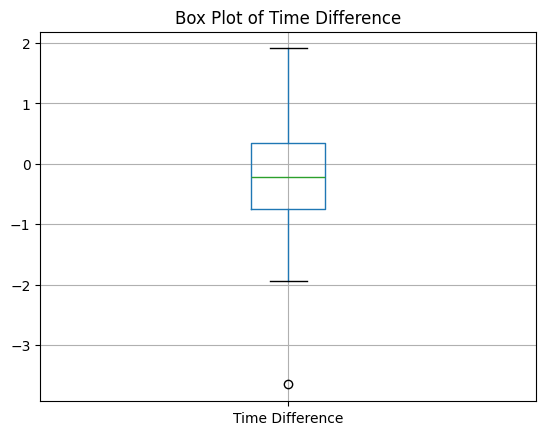

In [21]:
df.boxplot(column=["Time Difference"])

# Add labels and title
plt.title("Box Plot of Time Difference")

# Show the plot
plt.show()

In [22]:
THRESHOLD = 0.1
over_threshold = (df["Time Difference"] > THRESHOLD).sum()
count_under_threshold = (df["Time Difference"] < -THRESHOLD).sum()

print(f"Number of assert removed over threshold: {over_threshold}/{len(df)}")
print(f"Number of assert removed under threshold: {count_under_threshold}/{len(df)}")

over_threshold

Number of assert removed over threshold: 21/90
Number of assert removed under threshold: 30/90


21

In [23]:
df["New Method Result"].value_counts()

New Method Result
Correct          57
Errors           31
OutOfResource     2
Name: count, dtype: int64